In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load the Nashville zipcode data and look at the first few rows
geopandas reads files with the read_file() method
The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku

In [4]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [5]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [6]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             56 non-null     object  
 1   objectid        56 non-null     object  
 2   po_name         56 non-null     object  
 3   shape_stlength  56 non-null     object  
 4   shape_starea    56 non-null     object  
 5   geometry        56 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


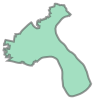

In [7]:
zipcodes.loc[0,'geometry']

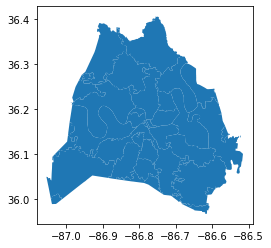

In [8]:
zipcodes.plot();

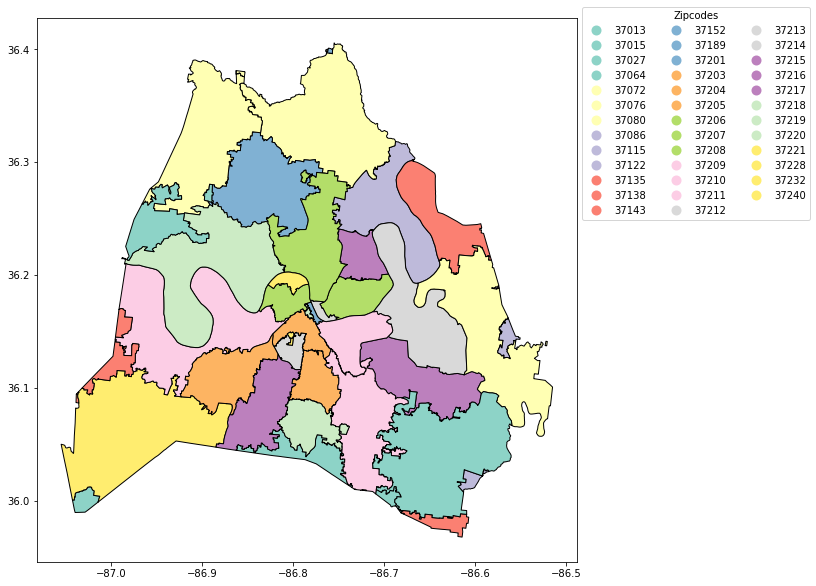

In [19]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [38]:
art_nash = pd.read_csv('../data/art_public.csv')
print(art_nash.shape)
art_nash.head(3)

(164, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"


In [39]:
art_nash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              164 non-null    object 
 1   Artist Last Name   164 non-null    object 
 2   Artist First Name  159 non-null    object 
 3   Location           164 non-null    object 
 4   Medium             162 non-null    object 
 5   Type               164 non-null    object 
 6   Description        107 non-null    object 
 7   Latitude           162 non-null    float64
 8   Longitude          162 non-null    float64
 9   Mapped Location    162 non-null    object 
dtypes: float64(2), object(8)
memory usage: 12.9+ KB


In [43]:
art_nash.loc[0].Latitude

36.1624

In [44]:
art_nash['geometry'] = art_nash.apply(lambda x: Point((x.Longitude, x.Latitude)), 
                                        axis=1)
art_nash.head(3)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491000000001 36.1624)
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594000000001 36.15961)


In [45]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
art_geo = gpd.GeoDataFrame(art_nash, 
                           crs = zipcodes.crs, 
                           geometry = art_nash['geometry'])

In [47]:
type(art_nash)

pandas.core.frame.DataFrame

In [48]:
type(art_geo)

geopandas.geodataframe.GeoDataFrame

In [49]:
art_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              164 non-null    object  
 1   Artist Last Name   164 non-null    object  
 2   Artist First Name  159 non-null    object  
 3   Location           164 non-null    object  
 4   Medium             162 non-null    object  
 5   Type               164 non-null    object  
 6   Description        107 non-null    object  
 7   Latitude           162 non-null    float64 
 8   Longitude          162 non-null    float64 
 9   Mapped Location    162 non-null    object  
 10  geometry           164 non-null    geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 14.2+ KB


In [50]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [52]:
art_by_zip = gpd.sjoin(art_geo, zipcodes, op = 'within')

In [53]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [55]:
art_by_zip['zip'].value_counts()

37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37214     6
37221     6
37209     4
37204     4
37115     3
37240     2
37213     2
37215     2
37207     2
37211     2
37216     2
37076     1
Name: zip, dtype: int64

In [68]:
art_in_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 14)

In [58]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

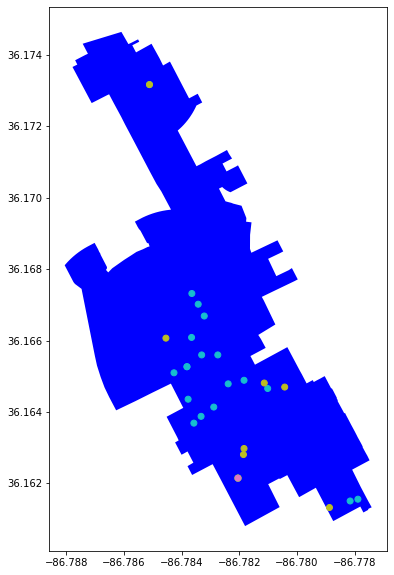

In [67]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'blue')
art_in_37219.plot( ax = ax, column = 'Type');
plt.show();

In [70]:
polygon37219.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_13184/226734311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37219.geometry.centroid


24    POINT (-86.78317 36.16682)
dtype: geometry

In [71]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37219.geometry.centroid[24]
print(center)

POINT (-86.78317337070099 36.16681838008157)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_13184/171388184.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid[24]


In [72]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16681838008157, -86.783173370701]


In [73]:
#create our map of Nashville Zip Code 37207 and show it
map_37219 = folium.Map(location =  area_center, zoom_start = 12)
map_37219

In [76]:
i = 0
for row_index, row_values in art_in_37219.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
Title                                                     Anticipation
Artist Last Name                                                 Faxon
Artist First Name                                              Russell
Location                            505 Deaderick Street, Nashville TN
Medium                                                Cold cast bronze
Type                                                         Sculpture
Description          A statue of a woman with legs crossed sitting ...
Latitude                                                      36.16489
Longitude                                                    -86.78184
Mapped Location                                  (36.16489, -86.78184)
geometry                                    POINT (-86.78184 36.16489)
index_right                                                         24
zip                                                              37219
po_name                                             

In [78]:
#draw our zip code area: 37219
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#iterate through stops_in_37219 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Type'])
    icon=folium.Icon(color="blue",icon="diamond", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37219)
map_37219.save('../maps/map37219.html')

#display our map
map_37219

In [79]:
folium.Map?

In [80]:
cluster_map_37219 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37219)

folium.GeoJson(polygon37219).add_to(cluster_map_37219)

# inside the loop add each marker to the cluster
for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Type'])
    icon=folium.Icon(color="blue",icon="diamond", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37219.save('../maps/cluster37219.html')

cluster_map_37219  

In [81]:
#draw our zip code area: 37219
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#create a list of locations and pass them to FastMarkerCluster()
locations = art_in_37219[['Latitude', 'Longitude']].values.tolist()
map_37219.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37219